
# Assignment 1 - appendix

In [1]:
import numpy as np #computations
import pandas as pd #data processing

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [1]:
!pip install ISLP==0.3.19

In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model

In [6]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
#a
Vars = ['Price','Urban','US']
y = Carseats['Sales']
X = MS(Vars).fit_transform(Carseats)
model = sm.OLS(y, X) #Fitting Mutilinear Regression Model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.39e-23
Time:                        17:08:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#e
Vars1 = ['Price','US']
y = Carseats['Sales']
X = MS(Vars1).fit_transform(Carseats)
model = sm.OLS(y, X) # Fitting Mutilinear Regression Model
results1 = model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.66e-24
Time:                        17:08:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#g 95% C.I.
print(results1.conf_int(alpha=0.05,cols=None))

                  0          1
intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US[Yes]     0.69152   1.707766


Text(0.5, 1.0, 'Residual vs Fitted')

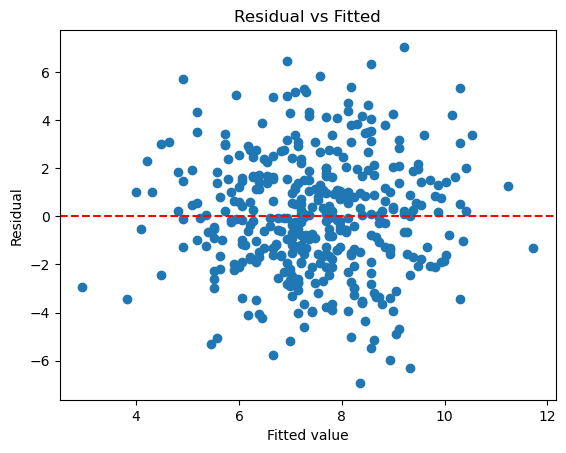

In [20]:
#h
from matplotlib import pyplot as plt
plt.scatter(results1.fittedvalues , results1.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs Fitted')

Text(0.5, 1.0, 'Residual vs Leverage')

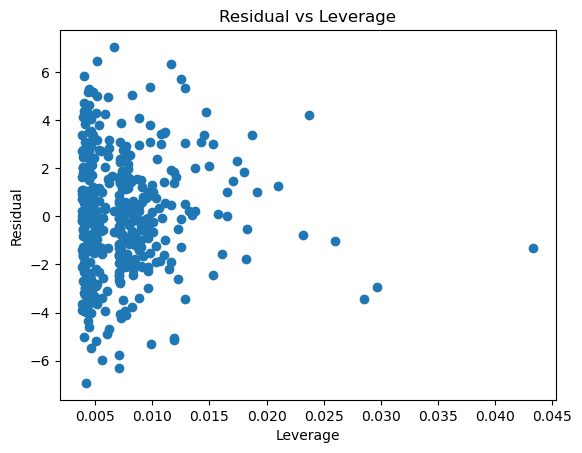

In [13]:
from matplotlib import pyplot as plt
plt.scatter(results1.get_influence().hat_matrix_diag, results1.resid)
plt.xlabel('Leverage')
plt.ylabel('Residual')
plt.title('Residual vs Leverage')